# Programming Assignment

## CNN classifier for the MNIST dataset

In [41]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [43]:
# GPU Status...
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.config.experimental.get_memory_info('GPU:0'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{'current': 9203968, 'peak': 1130673664}


### The MNIST dataset¶
In this assignment, you will use the MNIST dataset.

#### Load and preprocess the data

In [44]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [45]:
np.histogram(train_images)

(array([38847859,   571880,   514157,   438029,   446644,   503214,
          469607,   518723,   611860,  4118027], dtype=int64),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

In [46]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    
    tr = train_images / 255.
    te = test_images / 255.
    return(tr, te)


In [47]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [48]:
np.histogram(scaled_train_images)

(array([38847859,   571880,   514157,   438029,   446644,   518761,
          454060,   518723,   611860,  4118027], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [49]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

In [50]:
print(scaled_train_images.shape)
print(train_labels.shape)

print(scaled_test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


### Build the convolutional neural network model
We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the input_shape in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the input_shape keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.
* In particular, your neural network should have six layers.

In [51]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    print(input_shape)
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential()
    # model.add(Conv2D(8, (3,3), activation='relu', input_shape=input_shape, padding='SAME'))
    model.add(Conv2D(8, (3,3), activation='relu', input_shape=input_shape, padding='VALID'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [52]:
# Run your function to get the model
model = get_model(scaled_train_images[0].shape)
print(model.summary())

(28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1352)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                86592     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                          

### Compile the model¶
You should now compile the model using the compile method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [53]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    opt = tf.keras.optimizers.Adam()
    # acc = tf.keras.metrics.Accuracy()
    acc = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=[acc])


In [54]:
# Run your function to compile the model

compile_model(model)

### Fit the model to the training data
Now you should train the model on the MNIST dataset, using the model's fit method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [55]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    # fit method
    history = model.fit(scaled_train_images, train_labels, batch_size=128, epochs=30, verbose=2)
    return history


In [56]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/30
469/469 - 2s - loss: 0.3675 - sparse_categorical_accuracy: 0.8958 - 2s/epoch - 3ms/step
Epoch 2/30
469/469 - 1s - loss: 0.1332 - sparse_categorical_accuracy: 0.9589 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0926 - sparse_categorical_accuracy: 0.9727 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0685 - sparse_categorical_accuracy: 0.9790 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0559 - sparse_categorical_accuracy: 0.9823 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0450 - sparse_categorical_accuracy: 0.9862 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0379 - sparse_categorical_accuracy: 0.9880 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0302 - sparse_categorical_accuracy: 0.9905 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s - loss: 0.0263 - sparse_categorical_accuracy: 0.9919 - 1s/epoch - 3ms/step
Epoch 10/30
469/469 - 1s - loss: 0.0230 - sparse_categorical_accuracy: 0.9927 - 1s/epoch - 3ms/step
Epoch 11/

# Plot the learning curves
We will now plot two graphs:

* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas DataFrame and use the plot method to output the required graphs.

In [57]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

In [58]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loss                         30 non-null     float64
 1   sparse_categorical_accuracy  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

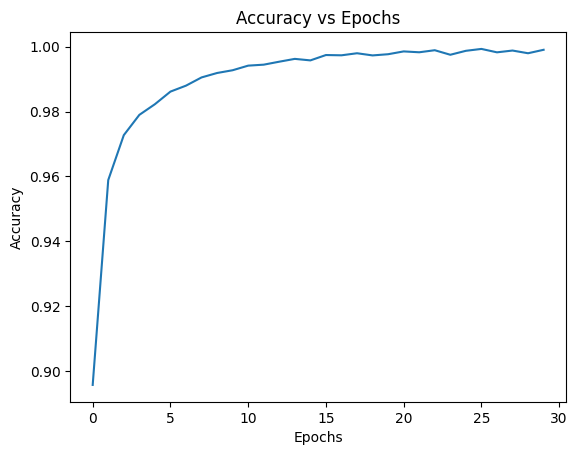

In [59]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

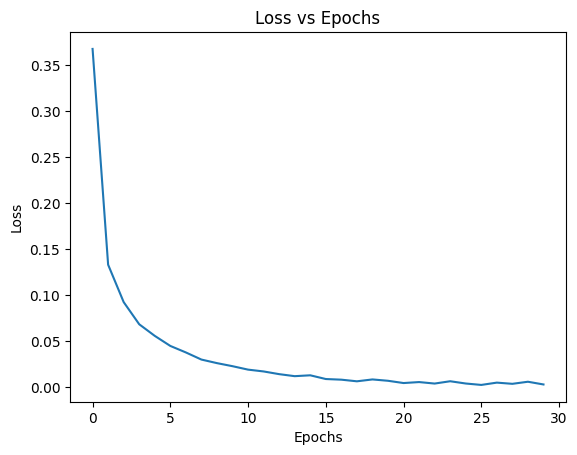

In [60]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# Evaluate the model
Finally, you should evaluate the performance of your model on the test set, by calling the model's evaluate method.

In [61]:

print("Test Loss = {}".format(loss))
print("Test Accuracy = {}".format(accuracy))

Test Loss = 51.977169036865234
Test Accuracy = 0.9678999781608582


In [62]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    return (test_loss, test_accuracy)
    

In [63]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 - 1s - loss: 71.4537 - sparse_categorical_accuracy: 0.9576 - 641ms/epoch - 2ms/step
Test loss: 71.45372009277344
Test accuracy: 0.9575999975204468


# Model predictions
Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 33ms/step


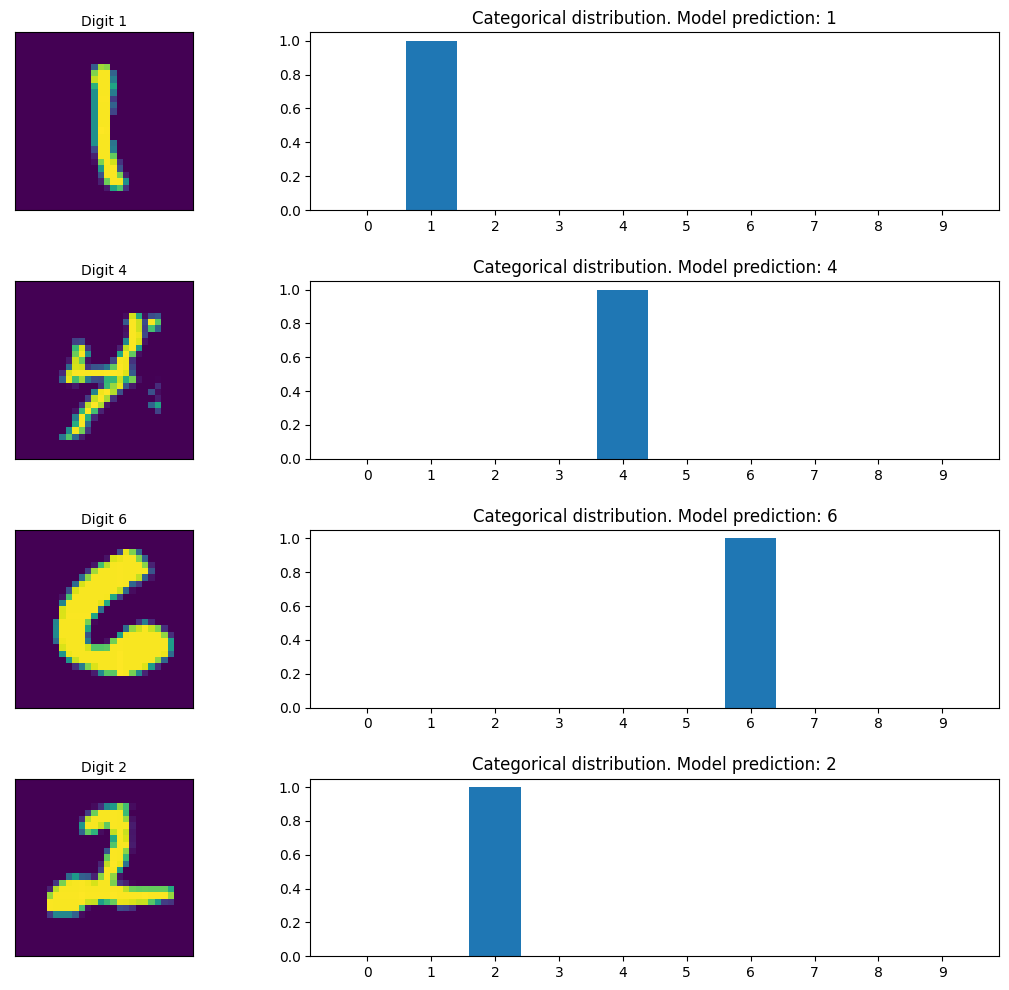

In [64]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()